In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
from astropy.visualization import SqrtStretch, LinearStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from error_propagation import Complex
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

norm = ImageNormalize(stretch=SqrtStretch())

# Galfic Plotting Code
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')

In [81]:
image_file = "Rommulus_withLight_Mock_i2_SNIa_z1_cusp.fits"
hdu_list = fits.open(image_file)
hdu_list.info()
hdu_list[0].header

Filename: Rommulus_withLight_Mock_i2_SNIa_z1_cusp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (1039, 1039, 6)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1039                                                  
NAXIS2  =                 1039                                                  
NAXIS3  =                    6                                                  
EXTEND  =                    T                                                  
BUNIT   = 'electron/s'                                                          
TELESCOP= 'HST     '                                                            
INSTRUME= 'WFC3    '                                                            
FILTER  = 'SDSS-r (F625W)'                                                      
PHOTFLAM=              1.2E-19 / erg/cm**2/AA/electron                          
WL_PIVOT=               6266

In [82]:
image_data = hdu_list[0].data[0]
sup_data = hdu_list[0].data[4]
gal_data = hdu_list[0].data[2]
hdu_list.close()

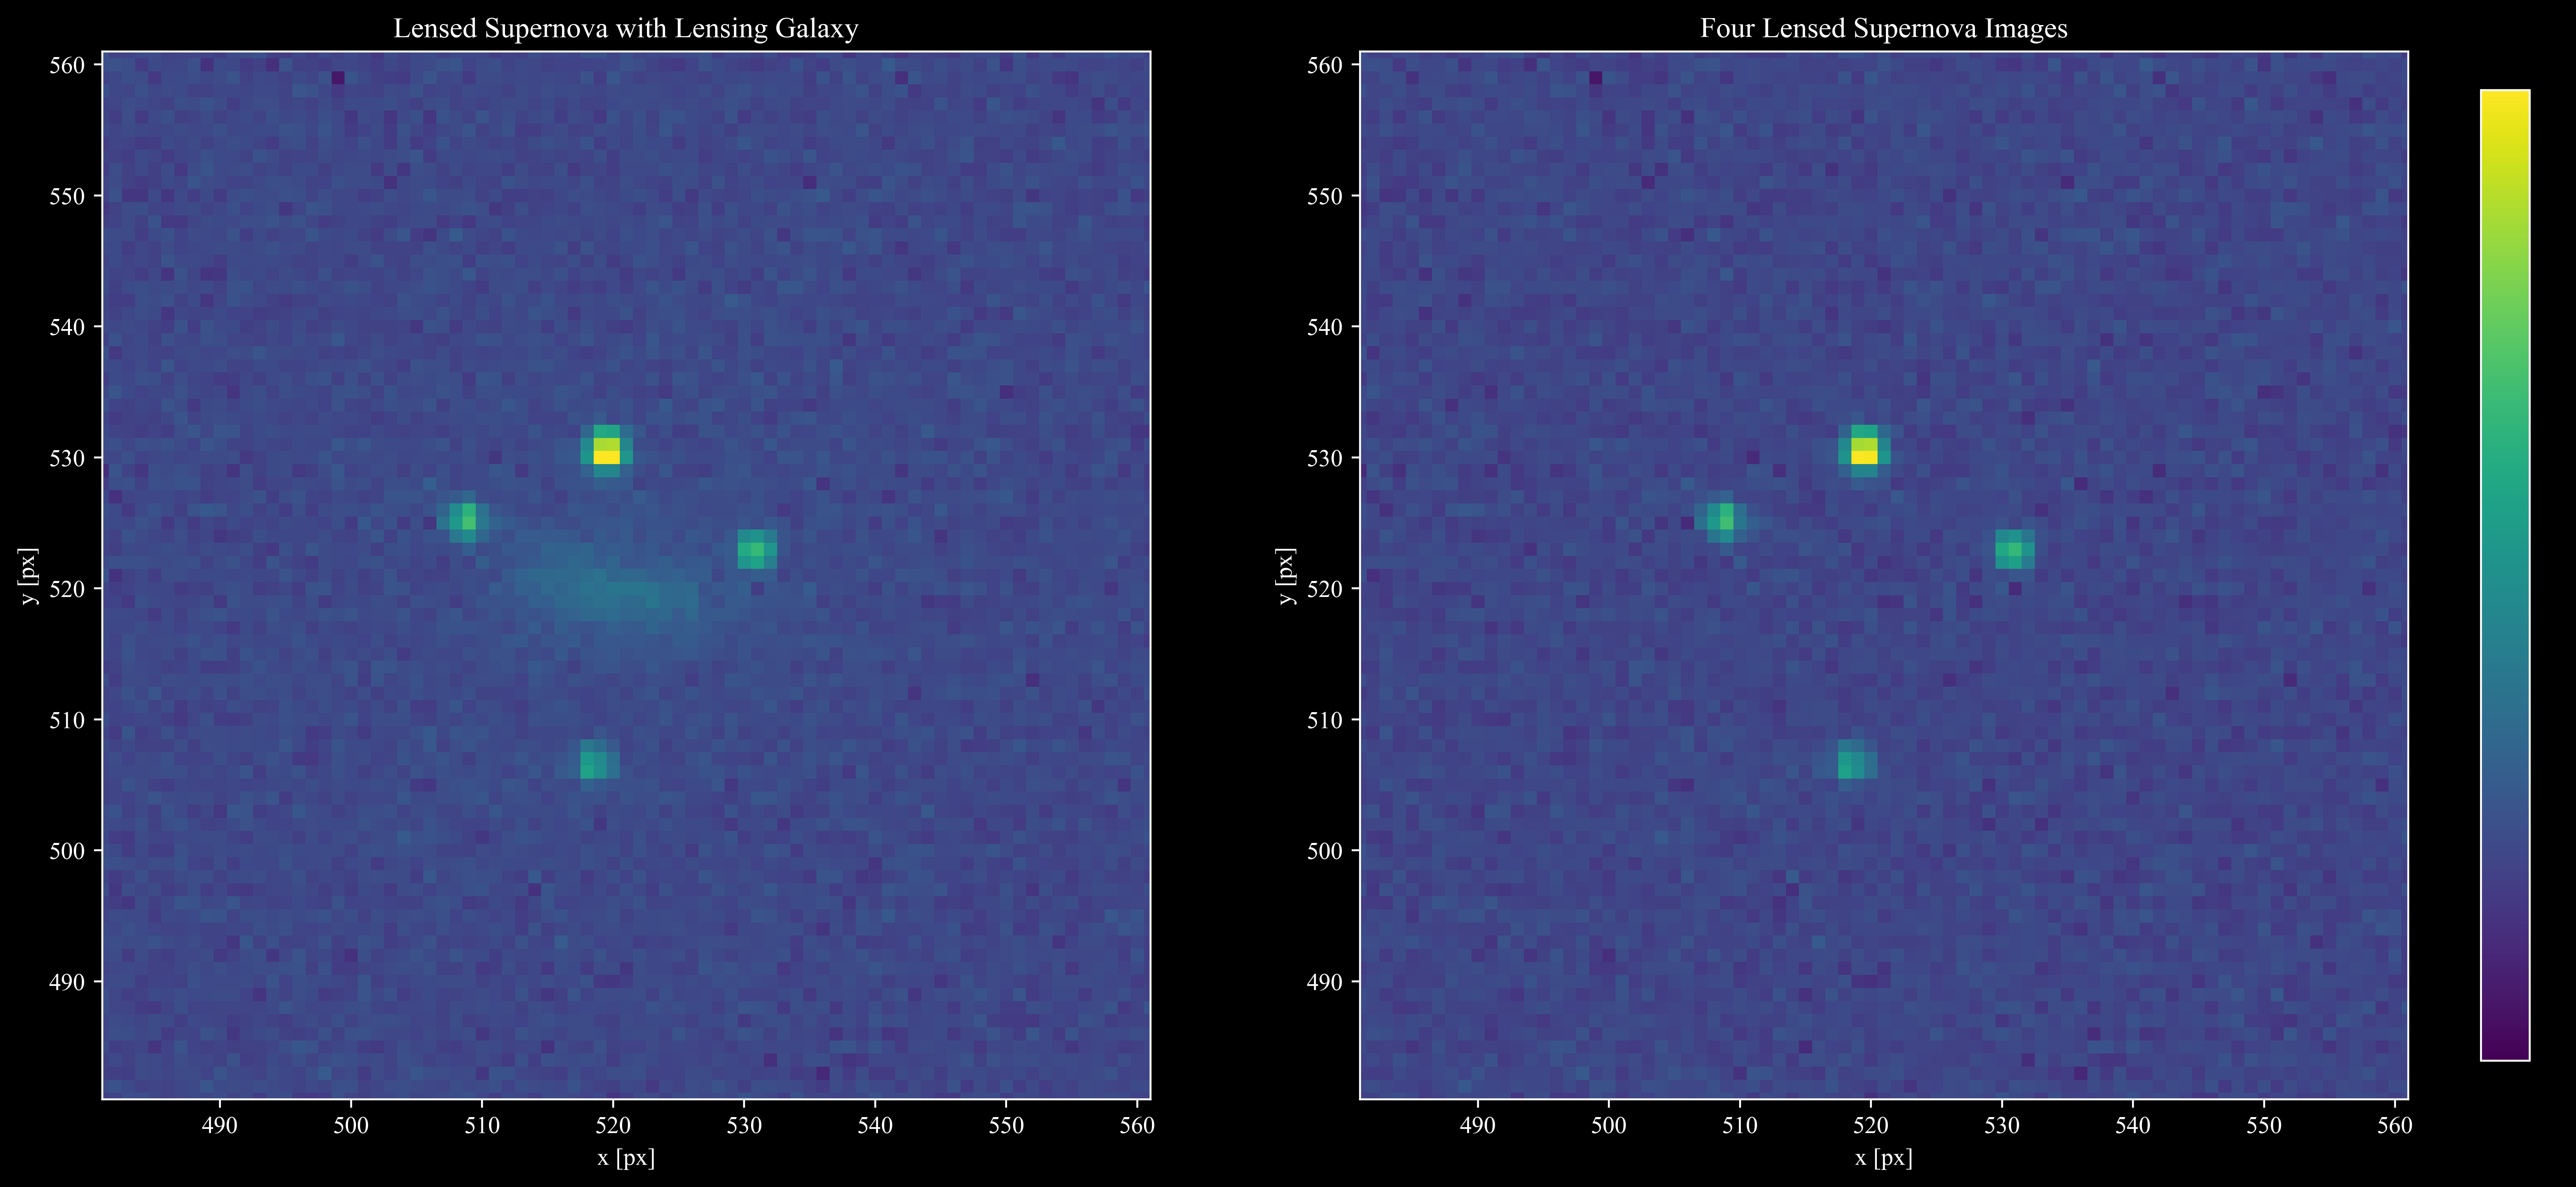

In [102]:
# Adjusting the space between the plots

# Fixing the norm definition with proper vmin and vmax
norm = ImageNormalize(image_data, stretch=SqrtStretch(), vmin=np.min(image_data), vmax=np.max(image_data))

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 12), facecolor='black', dpi=500)  # Set the figure background to black

# Plotting the original image data
im1 = axes[0].imshow(image_data, cmap='viridis', norm=norm)
axes[0].set_title('Lensed Supernova with Lensing Galaxy', color='white')  # Set title color to white for visibility
axes[0].set_xlabel('x [px]')
axes[0].set_ylabel('y [px]')
axes[0].invert_yaxis()

# Plotting the supernova data
im2 = axes[1].imshow(sup_data, cmap='viridis', norm=norm)
axes[1].set_title('Four Lensed Supernova Images', color='white')  # Set title color to white for visibility
axes[1].set_xlabel('x [px]')
axes[1].set_ylabel('y [px]')
axes[1].invert_yaxis()

# Adding a colorbar for the second subplot
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), orientation='vertical', pad=0.03, fraction=0.02)  # Use all axes for consistent size
cbar.ax.tick_params(labelcolor='black', color = 'black')  # Change the color of the colorbar ticks to white

# Restoring axis limits
axes[0].set_xlim(481, 561)
axes[0].set_ylim(481, 561)
axes[1].set_xlim(481, 561)
axes[1].set_ylim(481, 561)

plt.show()

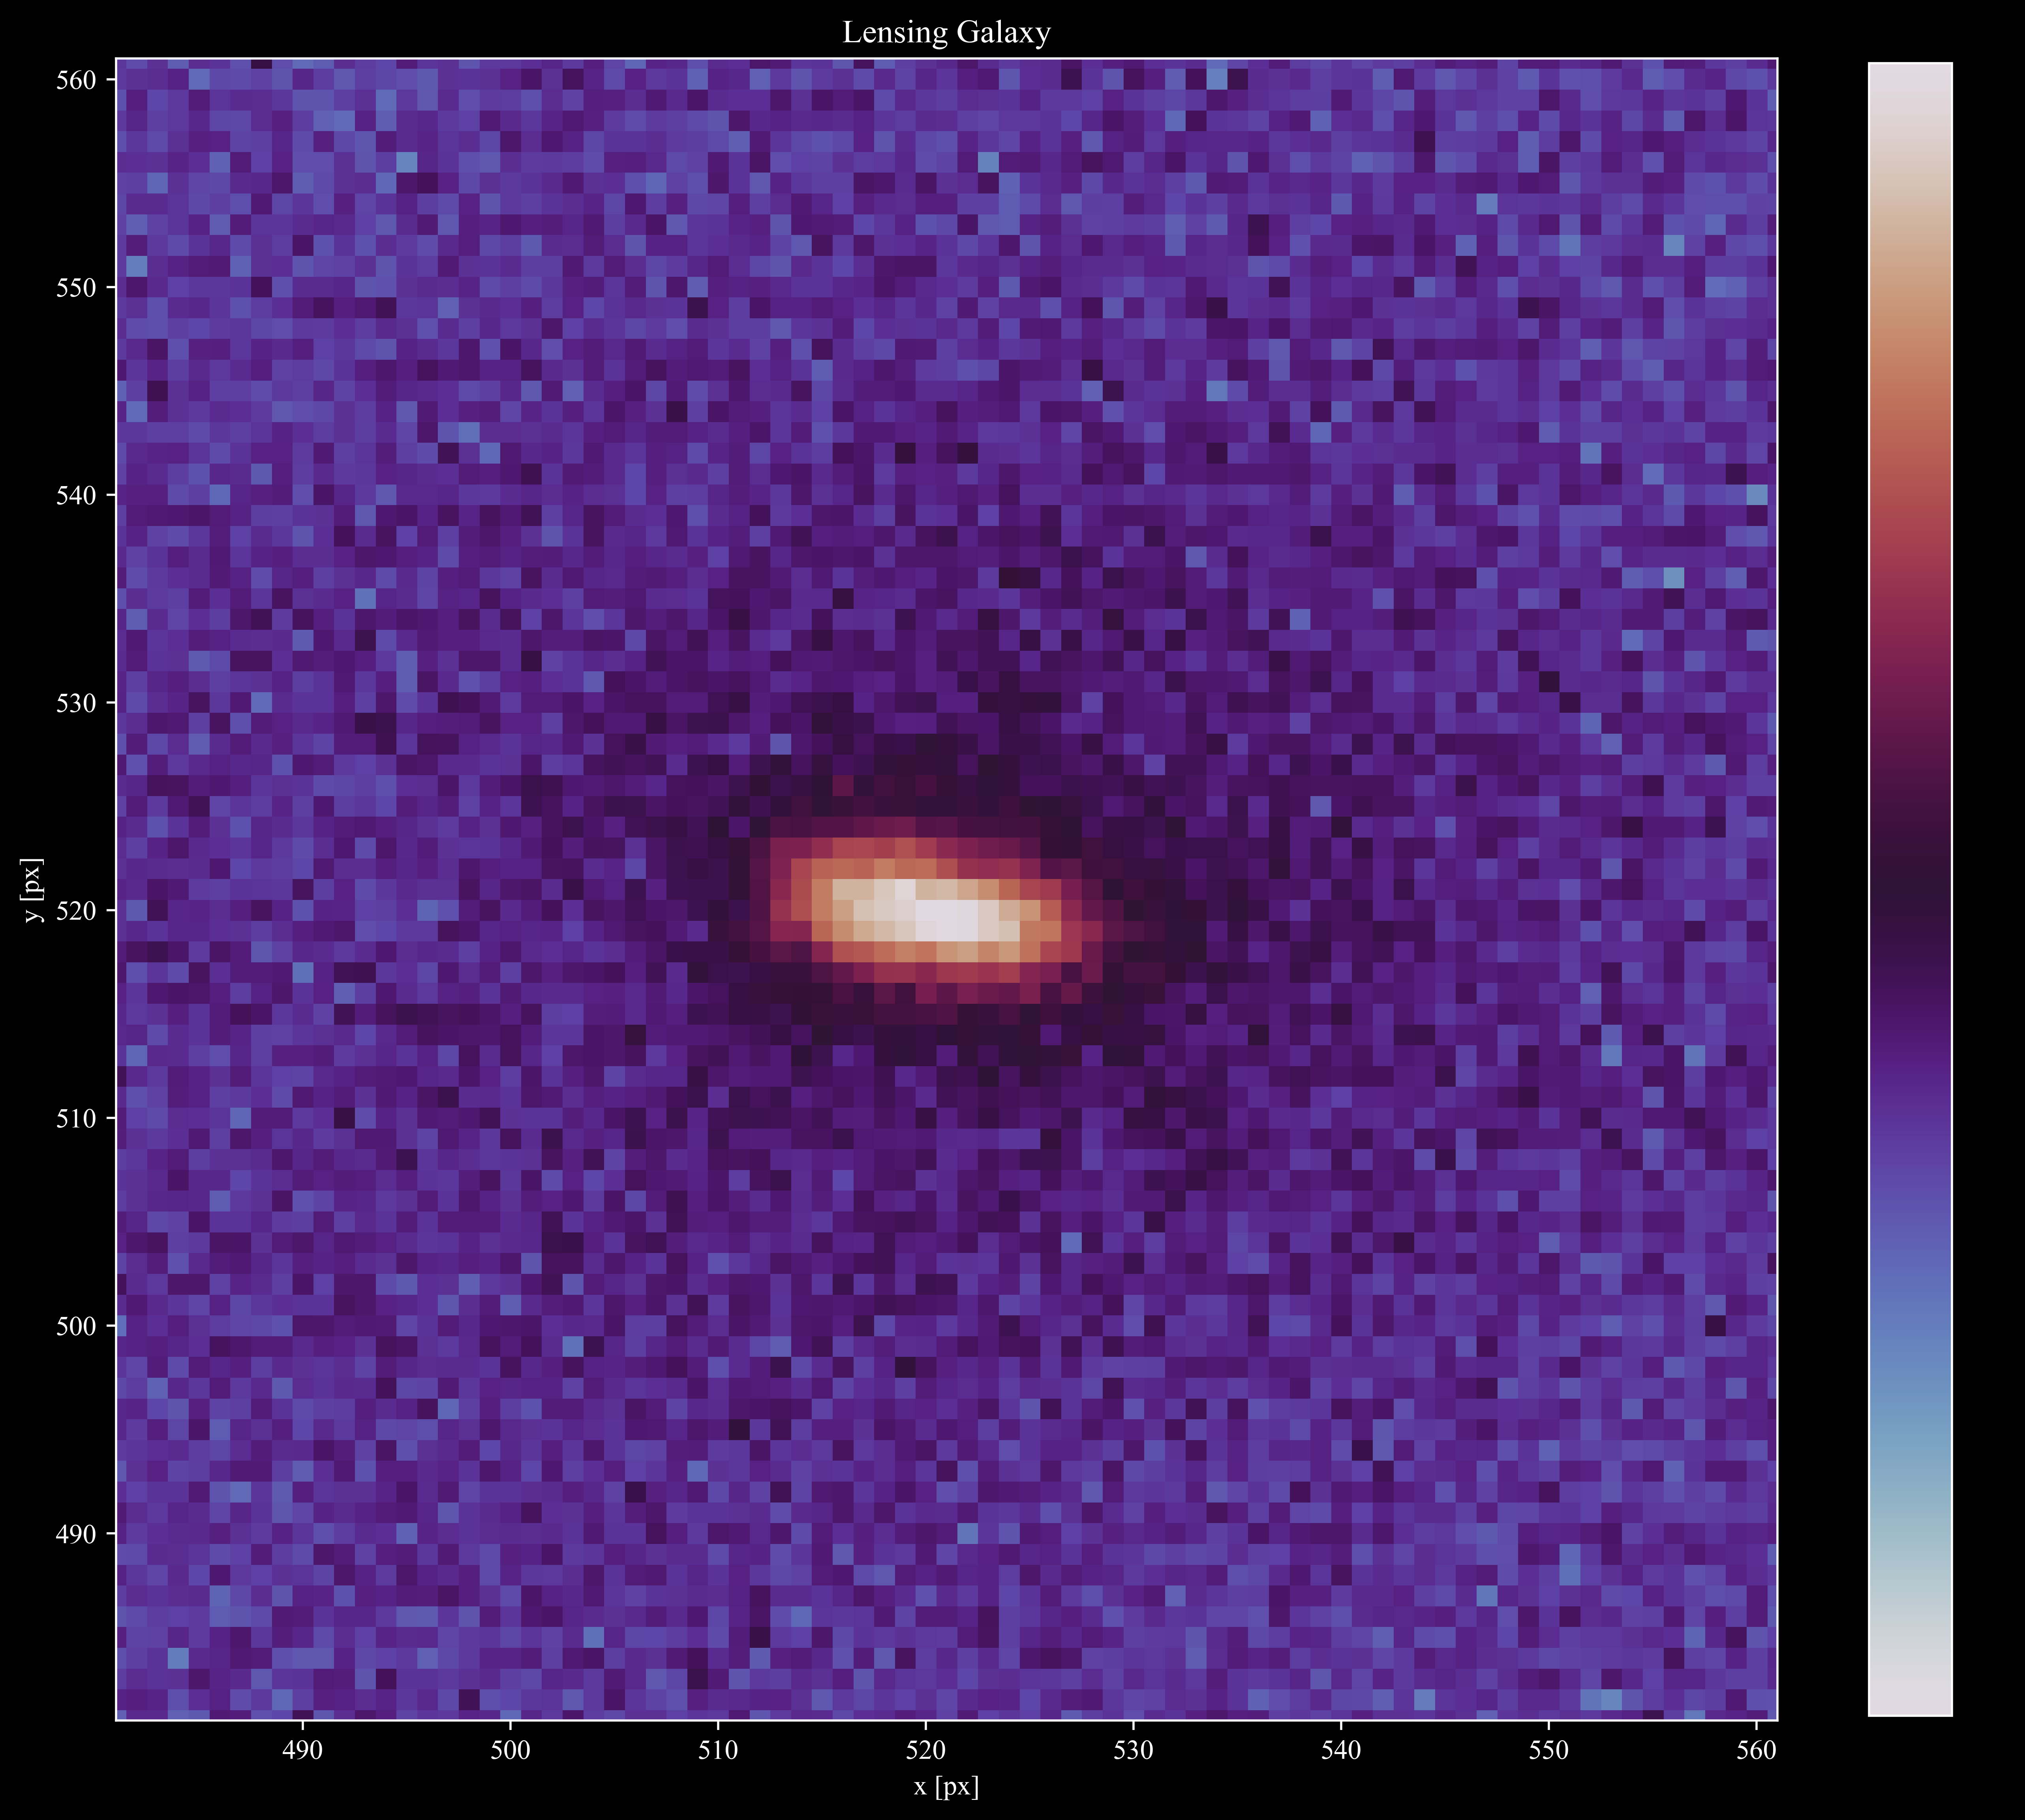

In [97]:
norm = ImageNormalize(stretch=SqrtStretch(), vmin=np.min(gal_data), vmax=np.max(gal_data))

# Creating plot
plt.figure(figsize=(12, 12), facecolor='black', dpi=500)  # Set the figure background to black
plt.imshow(gal_data, cmap='twilight', norm=norm)
plt.title('Lensing Galaxy', color='white')  # Set title color to white for visibility
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.colorbar(fraction = 0.045).ax.tick_params(labelcolor='black', color='black')  # Change the color of the colorbar ticks to white

plt.gca().invert_yaxis()
plt.xlim(481, 561)
plt.ylim(481, 561)
plt.show()

In [2]:
# Glafic Tabular 

# Read_script.py
# Open the Python file as a text file
def glafic_tabular(filename_0, filename_6, save_table_flag = False, shear = False, show_shear = False, show_params = False):
    with open(filename_0, 'r') as file:
        # Read the contents of the file
        content = file.read()
        file.close()
    
    with open(filename_6, 'r') as file:
        content_opt = file.read()
        file.close()

    # Define a function to find a line in the file
    def find_line(word, content):
        content = content.split('\n')
        line_number = 0
        for line in content:
            line_number += 1
            if word in line:
                return line_number
        return "Line Not Found"
    
    def find_last_line(word, content):
        content = content.split('\n')
        line_number = 0
        last_occurrence = -1
        for line in content:
            line_number += 1
            if word in line:
                last_occurrence = line_number
        return last_occurrence

    # Set lens line number
    line_set_1 = find_line('glafic.set_lens(1,', content)
    line_opt_1 = find_line('glafic.setopt_lens(1,', content)

    if shear == True:
        line_set_2 = find_line('glafic.set_lens(2,', content)
        line_opt_2 = find_line('glafic.setopt_lens(2,', content)

    # Split the content by new line
    content_list = content.split('\n')

    # Get the set_lens line
    set_lens_1 = content_list[line_set_1-1]

    # Get the setopt_lens line
    setopt_lens_1 = content_list[line_opt_1-1]

    # Define the list of possible models
    models = ['SIE', 'POW', 'NFW', 'EIN']

    parts_set_lens = set_lens_1.split(',')
    parts_set_lens = [part.strip().strip("'") for part in parts_set_lens]

    parts_setopt_lens = setopt_lens_1.split(',')
    parts_setopt_lens = [part.strip().strip("'") for part in parts_setopt_lens]


    if shear == True:
    # Get the shear set_lens line
        set_lens_2 = content_list[line_set_2-1]

        # Get the shear setopt_lens line
        setopt_lens_2 = content_list[line_opt_2-1]

        parts_set_lens_2 = set_lens_2.split(',')
        parts_set_lens_2 = [part.strip().strip("'") for part in parts_set_lens_2]

        parts_setopt_lens_2 = setopt_lens_2.split(',')
        parts_setopt_lens_2 = [part.strip().strip("'") for part in parts_setopt_lens_2]

        if line_set_2 == "Line Not Found" or line_opt_2 == "Line Not Found":
            raise ValueError("Failed to find lens or setopt lens lines in the glafic file.")

        if 'pert' in set_lens_2:
            name = 'Shear'
            z_s = parts_set_lens_2[3]
            x = parts_set_lens_2[4]
            y = parts_set_lens_2[5]
            gamma = parts_set_lens_2[6]
            pa = parts_set_lens_2[7]
            NaN = parts_set_lens_2[8]
            pwi = parts_set_lens_2[9].replace(')', '') 

            z_s_flag = parts_setopt_lens_2[2]
            x_flag = parts_setopt_lens_2[3]
            y_flag = parts_setopt_lens_2[4]
            gamma_flag = parts_setopt_lens_2[5]
            pa_flag = parts_setopt_lens_2[6]
            NaN_flag = parts_setopt_lens_2[7]
            pwi_flag = parts_setopt_lens_2[8].replace(')', '') 

            line = find_last_line('lens   pert', content_opt)
            line_content = content_opt.split('\n')[line - 1]
            line_list = line_content.split()

            row_0 = [name, '$z_{s,fid}$', 'x', 'y', 'γ', '$θ_{γ}$', 'NaN', 'κ']
            row_1 = ['Input Value', z_s, x, y, gamma, pa, NaN, pwi]
            row_2 = ['Opt Result', line_list[3], line_list[4], line_list[5], line_list[6], line_list[7], line_list[8], line_list[9]]
            row_3 = ['Fixed', z_s_flag, x_flag, y_flag, gamma_flag, pa_flag, NaN_flag, pwi_flag]

            table_shear = pd.DataFrame([row_1, row_2, row_3], columns = row_0)
            if show_shear:
                print(table_shear)

            if save_table_flag:
                table_shear.to_csv('shear_table.csv')
        return table_shear

    if line_set_1 == "Line Not Found" or line_opt_1 == "Line Not Found":
        raise ValueError("Failed to find lens or setopt lens lines in the glafic file.")
    
    for i in models:
        i = i.lower()
        if i in set_lens_1:
            if i == models[1].lower(): # POW model
                name = models[1]
                z_s = parts_set_lens[3]
                x = parts_set_lens[4]
                y = parts_set_lens[5]
                e = parts_set_lens[6]
                pa = parts_set_lens[7]
                r_ein = parts_set_lens[8]
                pwi = parts_set_lens[9].replace(')', '') 

                z_s_flag = parts_setopt_lens[2]
                x_flag = parts_setopt_lens[3]
                y_flag = parts_setopt_lens[4]
                e_flag = parts_setopt_lens[5]
                pa_flag = parts_setopt_lens[6]
                r_ein_flag = parts_setopt_lens[7]
                pwi_flag = parts_setopt_lens[8].replace(')', '') 

                line = find_last_line('lens   pow', content_opt)
                line_content = content_opt.split('\n')[line - 1]
                line_list = line_content.split()

                chi = find_last_line('chi^2', content_opt)
                chi_content = content_opt.split('\n')[chi - 1]
                chi_list = chi_content.split()

                row_0 = [name, '$z_{s,fid}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{Ein}$', 'γ (PWI)']
                row_1 = ['Input Value', z_s, x, y, e, pa, r_ein, pwi]
                row_2 = ['Opt Result', line_list[3], line_list[4], line_list[5], line_list[6], line_list[7], line_list[8], line_list[9]]
                row_3 = ['Fixed', z_s_flag, x_flag, y_flag, e_flag, pa_flag, r_ein_flag, pwi_flag]

                table = pd.DataFrame([row_1, row_2, row_3], columns = row_0)

            elif i == models[0].lower(): # SIE model
                name = models[0]
                sigma = parts_set_lens[3]
                x = parts_set_lens[4]
                y = parts_set_lens[5]
                e = parts_set_lens[6]
                pa = parts_set_lens[7]
                r_core = parts_set_lens[8]
                pwi = parts_set_lens[9].replace(')', '') 

                sigma_flag = parts_setopt_lens[2]
                x_flag = parts_setopt_lens[3]
                y_flag = parts_setopt_lens[4]
                e_flag = parts_setopt_lens[5]
                pa_flag = parts_setopt_lens[6]
                r_core_flag = parts_setopt_lens[7]
                pwi_flag = parts_setopt_lens[8].replace(')', '') 

                line = find_last_line('lens   sie', content_opt)
                line_content = content_opt.split('\n')[line - 1]
                line_list = line_content.split()

                chi = find_last_line('chi^2', content_opt)
                chi_content = content_opt.split('\n')[chi - 1]
                chi_list = chi_content.split()

                row_0 = [name, 'σ', 'x', 'y', 'e', '$θ_{e}$', '$r_{core}$', 'NaN']
                row_1 = ['Input Value', sigma, x, y, e, pa, r_core, pwi]
                row_2 = ['Opt Result', line_list[3], line_list[4], line_list[5], line_list[6], line_list[7], line_list[8], line_list[9]]
                row_3 = ['Fixed', sigma_flag, x_flag, y_flag, e_flag, pa_flag, r_core_flag, pwi_flag]

                table = pd.DataFrame([row_1, row_2, row_3], columns = row_0)

            elif i == models[2].lower(): # NFW model    
                name = models[2]
                m = parts_set_lens[3]
                x = parts_set_lens[4]
                y = parts_set_lens[5]
                e = parts_set_lens[6]
                pa = parts_set_lens[7]
                c = parts_set_lens[8]
                Nan = parts_set_lens[9].replace(')', '') 

                m_flag = parts_setopt_lens[2]
                x_flag = parts_setopt_lens[3]
                y_flag = parts_setopt_lens[4]
                e_flag = parts_setopt_lens[5]
                pa_flag = parts_setopt_lens[6]
                c_flag = parts_setopt_lens[7]
                Nan_flag = parts_setopt_lens[8].replace(')', '')

                line = find_last_line('lens   anfw', content_opt)
                line_content = content_opt.split('\n')[line - 1]
                line_list = line_content.split()

                chi = find_last_line('chi^2', content_opt)
                chi_content = content_opt.split('\n')[chi - 1]
                chi_list = chi_content.split()

                row_0 = [name, 'M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', 'NaN']
                row_1 = ['Input Value', m, x, y, e, pa, c, Nan]
                row_2 = ['Opt Result', line_list[3], line_list[4], line_list[5], line_list[6], line_list[7], line_list[8], line_list[9]]
                row_3 = ['Fixed', m_flag, x_flag, y_flag, e_flag, pa_flag, c_flag, Nan_flag]

                table = pd.DataFrame([row_1, row_2, row_3], columns = row_0)
            
            elif i == models[3].lower(): # EIN model
                name = models[3]
                m = parts_set_lens[3]
                x = parts_set_lens[4]
                y = parts_set_lens[5]
                e = parts_set_lens[6]
                pa = parts_set_lens[7]
                ce_rs = parts_set_lens[8]
                alpha_e = parts_set_lens[9].replace(')', '')

                m_flag = parts_setopt_lens[2]
                x_flag = parts_setopt_lens[3]
                y_flag = parts_setopt_lens[4]
                e_flag = parts_setopt_lens[5]
                pa_flag = parts_setopt_lens[6]
                ce_rs_flag = parts_setopt_lens[7]
                alpha_e_flag = parts_setopt_lens[8].replace(')', '')

                line = find_last_line('lens   ein', content_opt)
                line_content = content_opt.split('\n')[line - 1]
                line_list = line_content.split()

                chi = find_last_line('chi^2', content_opt)
                chi_content = content_opt.split('\n')[chi - 1]
                chi_list = chi_content.split()

                row_0 = [name, 'M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', '$α_{e}$']
                row_1 = ['Input Value', m, x, y, e, pa, ce_rs, alpha_e]
                row_2 = ['Opt Result', line_list[3], line_list[4], line_list[5], line_list[6], line_list[7], line_list[8], line_list[9]]
                row_3 = ['Fixed', m_flag, x_flag, y_flag, e_flag, pa_flag, ce_rs_flag, alpha_e_flag]

                table = pd.DataFrame([row_1, row_2, row_3], columns = row_0)

            
            if show_params:
                print(table)

            if save_table_flag:
                table.to_csv('table.csv')
            
            return table, chi_list

    print("Model not found")
    return None  # Explicitly return None if no model is found



# Position and Magnification Plots

def error_plot(filename_1, filename_2, filename_4, filename_5, plot_name, num_images, name_1, name_2,
               table_flag = False, glafic_file_1=None, glafic_file_2=None, shear = False, show_shear = False, show_params = False):
    
    if table_flag:
        if glafic_file_1 is None:
            print("Please provide the filename for the glafic script")
            raise ValueError("Glafic File not provided")
        elif glafic_file_2 is None:
            print("Please provide the Opt Result filename for the glafic script")
            raise ValueError("Glafic File not provided")

    if table_flag:    
        table, chi2 = glafic_tabular(glafic_file_1, glafic_file_2, show_params=show_params)
        if table is None:
            raise ValueError("Failed to create the table from the glafic file.")

    if shear:
        table_shear = glafic_tabular(glafic_file_1, glafic_file_2, shear = True, show_shear = show_shear, show_params=show_params)
        if table_shear is None:
            raise ValueError("Failed to create the table from the glafic file.")
        
    # Storage for parsed data
    data = []
    
    # val = pd.read_csv(filename_4)
    # val.__dataframe__
    # val_column = val.columns[0]

    # # Split the values in the data_column and expand into separate columns
    # val = val[val_column].str.split(expand=True)

    # # Convert the DataFrame to numeric type
    # val = val.apply(pd.to_numeric)

    # print(val)

    with open(filename_2, 'r') as file:
        for line in file:
            # Skip lines starting with "#"
            if line.startswith("#"):
                continue
            
            # Split the line by whitespace
            line_data = line.split()
            
            # Remove # 
            line_data = [float(val) for val in line_data if val != '#']  
            
            data.append(line_data)
    
    val = pd.DataFrame(data)
    val = val.iloc[1:]
    brightest_flux = max(val[2])
    brightest_index = val[2].idxmax()

    # Add a column called 'colour' to val
    val['colour'] = ''

    # Assign 'red' to the brightest image
    val.at[brightest_index, 'colour'] = 'red'

    # Get the coordinates of the brightest image
    brightest_x = val.at[brightest_index, 0]
    brightest_y = val.at[brightest_index, 1]

    # Calculate the angles of the other images relative to the brightest image
    angles = np.arctan2(val[1] - brightest_y, val[0] - brightest_x)

    # Sort the indices of the images by angle in clockwise order
    sorted_indices = angles.sort_values(ascending=False).index

    # Assign colours to the remaining images
    colours = ['green', 'yellow', 'blue']
    colour_index = 0
    for idx in sorted_indices:
        if val.at[idx, 'colour'] == '':
            val.at[idx, 'colour'] = colours[colour_index]
            colour_index += 1
    
    val['flux_ratio'] = abs(val[2] / brightest_flux)

    err_1 = Complex(val[2][1], val[4][1])
    err_2 = Complex(val[2][2], val[4][2])
    err_3 = Complex(val[2][3], val[4][3])
    err_4 = Complex(val[2][4], val[4][4])

    ratio_1 = str(Complex.truediv(err_1, err_2))
    ratio_2 = str(Complex.truediv(err_2, err_2))
    ratio_3 = str(Complex.truediv(err_3, err_2))
    ratio_4 = str(Complex.truediv(err_4, err_2))

    ratio_1_error = float(ratio_1.split(' ± ')[1])
    ratio_2_error = float(ratio_2.split(' ± ')[1])
    ratio_3_error = float(ratio_3.split(' ± ')[1])
    ratio_4_error = float(ratio_4.split(' ± ')[1])

    val['flux_ratio_error'] = [ratio_1_error, ratio_2_error, ratio_3_error, ratio_4_error]

    data = []

    # Line by line read (Remove # from obs file)
    with open(filename_1, 'r') as file:
        for line in file:
            # Skip lines starting with "#"
            if line.startswith("#"):
                continue
            
            # Split the line by whitespace
            line_data = line.split()
            
            # Remove # 
            line_data = [float(val) for val in line_data if val != '#']  
            
            data.append(line_data)
    
    # Convert to DataFrame
    data_df = pd.DataFrame(data)

    # Exclude the first row
    data_df = data_df.iloc[1:]
    
    data_df.insert(8, "Label", val['colour'].map({'red': 'Red Image', 'green': 'Green Image', 'yellow': 'Yellow Image', 'blue': 'Blue Image'}), True)

    # Reorder the images according to the order red, green, yellow, blue
    order = ['Red Image', 'Green Image', 'Yellow Image', 'Blue Image']
    data_df['Label'] = pd.Categorical(data_df['Label'], categories=order, ordered=True)
    data_df = data_df.sort_values('Label').reset_index(drop=True)

    data_df = data_df.drop(columns =[3, 5, 6, 7])

    # Read and process the predicted data
    data_pred = pd.read_csv(filename_4, header=None, delim_whitespace=True, comment='#')
    df_pred = data_pred.iloc[1:]

    # Function for swapping data 
    def swap_rows(df, row1, row2):
        df.iloc[row1], df.iloc[row2] =  df.iloc[row2].copy(), df.iloc[row1].copy()
        return df
    
    # For loop to iterate over row range for row swapping
    for i in range(4):
        diff = abs(abs(data_df.iloc[i,0]) - abs(df_pred[0]))
        m = diff.idxmin()
        n = min(diff)
        if n < 0.1:
            df_pred = swap_rows(df_pred, i, (m-1))
        else:
            continue

    df_pred = df_pred.drop(columns =[3])

    # Eliminating the 5th image
    if len(df_pred[2])>num_images:
        i = len(df_pred[2]) - num_images
        for j in range(i):
            min_vales = np.min(abs(df_pred[2]))
            df_2 = abs(df_pred)
            b = df_2.index.get_loc(df_2[df_2[2] == min_vales].index[0])
            df_3 = df_pred.drop((b+1), axis='index')
            df_pred = df_3
            df_pred.reset_index(drop=True, inplace=True)
        df_pred.index = df_pred.index + 1

    df_pred = df_pred.reset_index(drop=True)

    # Calculations for Position Error values
    d_x = (abs(data_df[0]) - abs(df_pred[0])).abs()
    d_y = (abs(data_df[1]) - abs(df_pred[1])).abs()
    sum_sq = (d_x**2) + (d_y**2)
    sq = np.sqrt(sum_sq)
    rms = np.average(sq)
    rms_unit = rms*1000
    rms_round = round(rms_unit, 3)/1000
    rms_str = str(rms_round)

    # Plotting Position Error Graph
    # custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    # sns.set_theme(style="ticks", rc=custom_params)

    colours1 = ['lightsalmon', 'green', 'gold', 'blue']
    plt.figure(figsize=(15, 5), dpi = 500)
    plt.subplot(1, 3, 1)
    plt.bar(data_df['Label'], sq, color = colours1, width=0.3, ec = 'white')
    plt.axhline(xmin=0.045, xmax=0.13, y=1.28/1000, linestyle ='--', color ='r', linewidth = 2, label='1 σ Error')
    plt.axhline(xmin=0.32, xmax=0.40, y=0.85/1000, linestyle ='--', color ='r', linewidth = 2)
    plt.axhline(xmin=0.6, xmax=0.68, y=0.83/1000, linestyle ='--', color ='r', linewidth = 2)
    plt.axhline(xmin=0.87, xmax=0.95, y=0.39/1000, linestyle ='--', color ='r', linewidth = 2)
    plt.title('ΔRMS = ' + rms_str, fontsize=10)
    plt.legend(loc='upper right', fontsize='small')
    plt.xticks(fontsize=8)
    plt.ylim(0, max(sq)+0.005)
    plt.xlabel('Position error')
    plt.ylabel('Positional offset')

    # Calculations for Magnification value
    # Previous Code: f = df_pred[2][1]
    max_flux = max(abs(df_pred[2]))
    flux_ratio = df_pred[2]/max_flux
    df_pred[3] = abs(flux_ratio)

    # Create data 
    x = np.arange(4)
    width = 0.3

    # FITS image processing for predicted flux at observed positions 
    image = fits.open(filename_5)
    values = 1/image[0].data
    image.close()
    dat = values[6]
    g = (data_df[0]/0.001).astype(int) - 20000
    h = (data_df[1]/0.001).astype(int) - 20000


    g_max = (g + 10).astype(int)
    h_max = (h + 10).astype(int)
    g_min = (g - 10).astype(int)
    h_min = (h - 10).astype(int)


    flux_pos = []
    flux_pos_max = []
    flux_pos_min = []

    for i in range(0,4):
        flux_cal = dat[h[i]][g[i]]
        flux_pos.append(abs(flux_cal))
    

    for i in range(0,4):
        flux_cal_max = dat[h_max[i]][g_max[i]]
        flux_pos_max.append(abs(flux_cal_max))

    
    for i in range(0,4):
        flux_cal_min = dat[h_min[i]][g_min[i]]
        flux_pos_min.append(abs(flux_cal_min))
    
    arrow_legnths = (np.array(flux_pos_max) - np.array(flux_pos_min))/100
    # arrow_legnths = [0,0,0,0]
    true_flux = np.array(flux_pos)
    print(true_flux)

    # Switch columns of val according to the previous colour indexing
    val = val.set_index('colour').loc[['red', 'green', 'yellow', 'blue']].reset_index()

    height = max(val[2]) + 5
    # Plotting Flux Error Graph
    plt.subplot(1, 3, 2)
    plt.bar(x+0.15, val[2], width, color='red', edgecolor ='white', label = 'μ_obs/μ_ref') 
    plt.bar(x-0.15, abs(df_pred[2]), width, color='black', edgecolor='white', hatch='\\/', label='μ_pred/μ_ref') 
    plt.bar(x+0.45, true_flux, width, color='salmon', edgecolor='white', label = 'µ_pred/μ_ref (obs pos)')
    # plt.errorbar(x-0.15, val[0], yerr=3*(val[1]), fmt='o', color='black', capsize=4, label='3 σ Error') (OLD ERROR BAR)
    plt.errorbar(x+0.15, val[2], yerr=val[4], fmt='.', color='white', capsize=5, label='1 σ Error')
    plt.xticks(x+0.15, data_df['Label'], fontsize=8) 
    plt.arrow(x[0]+0.45, true_flux[0], 0, arrow_legnths[0], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[0]+0.45, true_flux[0], 0, -arrow_legnths[0], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[1]+0.45, true_flux[1], 0, arrow_legnths[1], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[1]+0.45, true_flux[1], 0, -arrow_legnths[1], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[2]+0.45, true_flux[2], 0, arrow_legnths[2], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[2]+0.45, true_flux[2], 0, -arrow_legnths[2], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[3]+0.45, true_flux[3], 0, arrow_legnths[3], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.arrow(x[3]+0.45, true_flux[3], 0, -arrow_legnths[3], head_width=0.1, head_length=0.5, fc='white', ec='white')
    plt.xlabel("Images") 
    plt.ylabel("Magnification") 
    plt.ylim()
    plt.legend(loc = 'upper right', fontsize='small')
    plt.title('Magnification Error', fontsize=10)
    plt.suptitle('Lens: ' + name_1 + ' | Constraint: ' + name_2)
    if table_flag:
        table_plot = plt.table(cellText=table.values, colLabels=table.columns, cellLoc = 'center', loc='bottom', bbox=[-1.0, -0.5, 3.0, 0.3])
        table_plot.auto_set_font_size(False)
        table_plot.set_fontsize(10)
        plt.suptitle('Lens ' + plot_name + ' constrained' + ' (Chi2 = ' + chi2[2] + ')')
        if shear == True:
            table_shear_plot = plt.table(cellText=table_shear.values, colLabels=table_shear.columns, cellLoc = 'center', loc='bottom', bbox=[-1.0, -0.9, 3.0, 0.3])
            table_shear_plot.auto_set_font_size(False)
            table_shear_plot.set_fontsize(10)

    return data_df, df_pred



# Critical Curves Plot

def critcurve_plot(filename_4, filename_3, pos_output, num_images):
    data_crit = pd.read_csv(filename_3, header= None, sep="\s+")
    data_crit.__dataframe__
    df = data_crit.iloc[1:]

    obs = pd.DataFrame(pos_output)

    # Initialize empty list 
    data = []

    # Read and process the predicted data
    de = pd.read_csv(filename_4, header=None, delim_whitespace=True, comment='#')
    de = de.iloc[1:]

    # Function for swapping data 
    def swap_rows(df, row1, row2):
        df.iloc[row1], df.iloc[row2] =  df.iloc[row2].copy(), df.iloc[row1].copy()
        return df
    
    # For loop to iterate over row range for row swapping
    for i in range(4):
        diff = abs(abs(obs.iloc[i,0]) - abs(de[0]))
        m = diff.idxmin()
        n = min(diff)
        if n < 0.1:
            de = swap_rows(de, i, (m-1))
        else:
            continue

        
    de = de.drop(columns =[3])

    # Eliminating the 5th image
    if len(de[2])>num_images:
        i = len(de[2]) - num_images
        for j in range(i):
            min_vales = np.min(abs(de[2]))
            df_4 = abs(de)
            b = df_4.index.get_loc(df_4[df_4[2] == min_vales].index[0])
            df_5 = de.drop((b+1), axis='index')
            de = df_5
            de.reset_index(drop=True, inplace=True)
        de.index = de.index + 1

    labels = ['A', 'B', 'C', 'D']

    # Plotting Critial Curves
    plt.subplot(1, 3, 3)
    plt.scatter(df[0]/0.04, df[1]/0.04, s=1, color = 'orange', label = 'Crtical Curve')
    plt.scatter(df[2]/0.04, df[3]/0.04, s=1, color = 'white', label = 'Caustic')
    plt.scatter(df[4]/0.04, df[5]/0.04, s=1, color = 'orange')
    plt.scatter(df[6]/0.04, df[7]/0.04, s=1, color = 'white')

    height_1 = max(df[0]/0.04)
    height_2 = max(df[1]/0.04)

    # colors = ['red',  'blue', 'green', 'gold']
    colors = obs['Label'].map({'Red Image': 'red', 'Green Image': 'green', 'Yellow Image': 'gold', 'Blue Image': 'blue'}).tolist()

    # Plotting obs image positions and labels 
    plt.scatter(de[0]/0.04, de[1]/0.04, s = 200, marker= '+', label = 'Predicted Position', color = colors, alpha = 1)
    plt.scatter(obs[0]/0.04, obs[1]/0.04, s=25, color = colors, marker = 'o', label = 'Observed Position')
    # for x, y, txt in zip(data_df[0]*100, data_df[1]*100, labels):
    #     plt.text(x, y-17, txt, fontsize=13, ha='center', va='bottom')

    plt.title('Critial Curves and Caustics', fontsize=10)
    plt.tick_params(labelsize=8)
    plt.xlabel('x [Pixel]')
    plt.ylabel('y [Pixel]', labelpad=5)
    plt.legend(fontsize = 7)
    # Calculate the natural limits of the graph
    x_min, x_max = min(df[0]/0.04), max(df[0]/0.04)
    y_min, y_max = min(df[1]/0.04), max(df[1]/0.04)

    # Define a zoom factor
    zoom_factor = 0.2

    # Calculate the limits with the zoom factor
    x_range = (x_max - x_min) * zoom_factor
    y_range = (y_max - y_min) * zoom_factor

    plt.xlim(x_min - x_range, x_max + x_range)
    plt.ylim(y_min - y_range, y_max + y_range)

    plt.show()


    
    return df

[33.857494 20.86611  11.395821 23.246796]


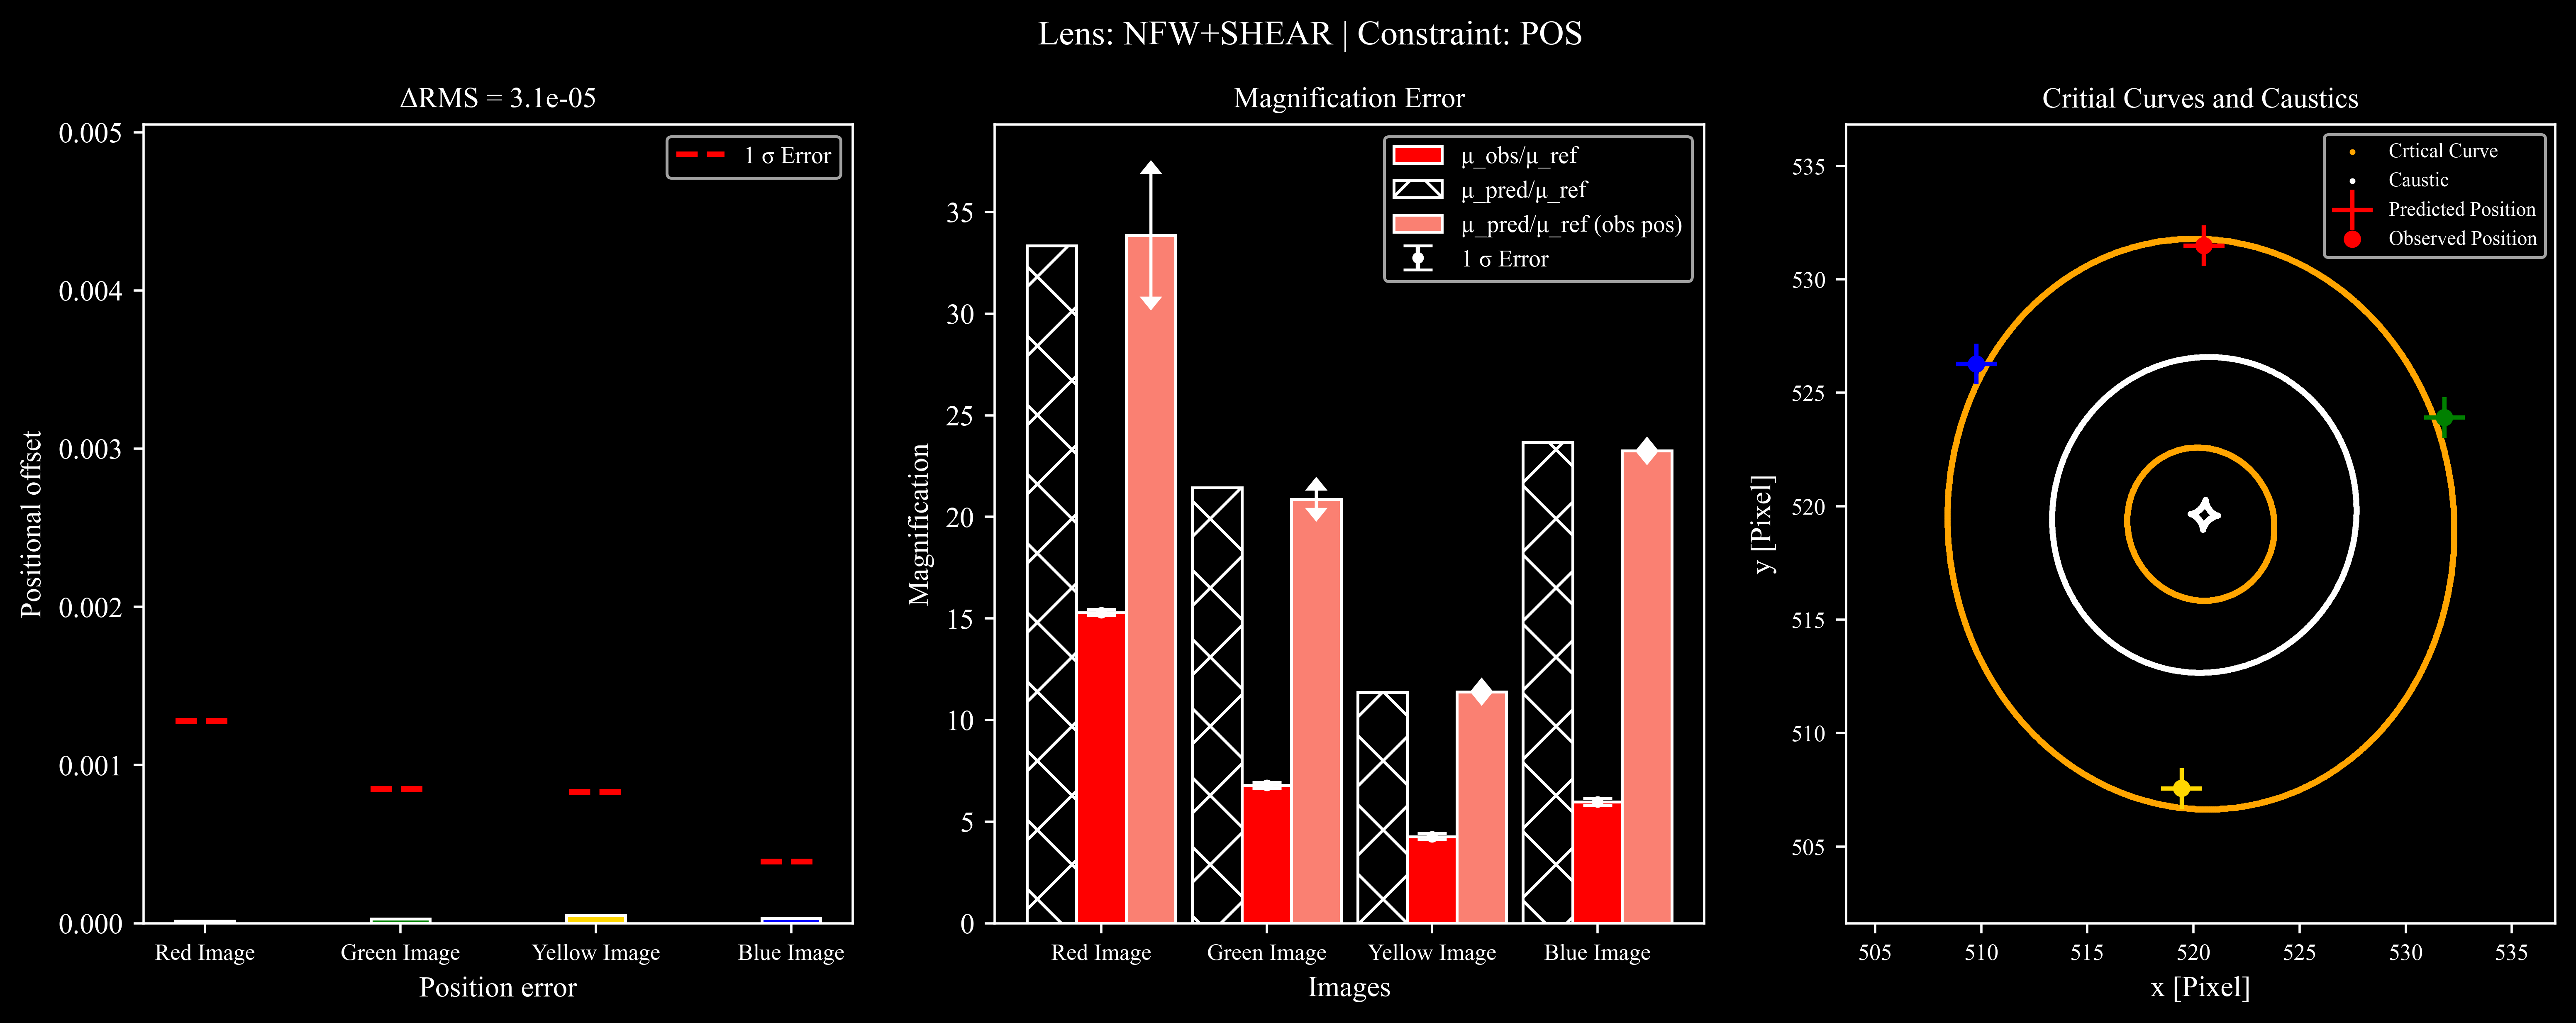

In [6]:
plot_name_1 = 'NFW_POS_SHEAR'
loc = 'NFW+SHEAR/'
name_1 = 'NFW+SHEAR'
name_2 = 'POS'

if 'POS+FLUX' in plot_name_1 or 'pos+flux' in plot_name_1:
    constraint = 'pos_flux'
else:
    constraint = 'pos'

filename_0 = loc + constraint + '_point.py'
filename_1 = 'obs_point/obs_point_(POS).dat'
filename_2 = 'obs_point/obs_point_(POS+FLUX).dat'
filename_3 = loc + plot_name_1 + '_crit.dat'
filename_4 = loc + plot_name_1 + '_point.dat'
filename_5 = loc + plot_name_1 + '_lens.fits'
filename_6 = loc + plot_name_1 + '_optresult.dat'
num_images = 4
plot_name = plot_name_1

if 'SHEAR' in plot_name or 'shear' in plot_name:
    shear_set = True
else:
    shear_set = False

if 'FLUX' in plot_name or 'flux' in plot_name or 'Flux' in plot_name:
    filename_1 = 'obs_point_SIE(POS+FLUX).dat'

glafic_tabular(filename_0, filename_6, save_table_flag = False, shear=shear_set, show_shear=False, show_params=False)

obs_data, pred_data = error_plot(filename_1, filename_2, filename_4, filename_5, plot_name, num_images, name_1= name_1, name_2 = name_2, table_flag=False, glafic_file_1= filename_0, glafic_file_2=filename_6, shear = shear_set, show_params=False, show_shear=False)

curve_data = critcurve_plot(filename_4, filename_3, pos_output=obs_data, num_images=num_images)

In [12]:
import pandas as pd
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import os
import re
import subprocess # Using subprocess for better script execution control
# Need sys if switching to subprocess.run
# import sys
# Need get_ipython if using %run magic
from IPython import get_ipython


# ==============================================================
# _process_single_model function remains the same as provided
# ==============================================================
# Helper function to process a single model (normal or shear)
def _process_single_model(model_path, model_ver, obs_coords):
    """
    Processes a single lens model, runs glafic, and extracts results.

    Args:
        model_path (str): Path to the model directory (e.g., 'NFW', 'NFW+SHEAR').
        model_ver (str): Specific version/run name (e.g., 'NFW_POS+FLUX', 'NFW_POS+FLUX_SHEAR').
        obs_coords (pd.DataFrame): DataFrame with observed positions ('x', 'y') already transformed for plotting.

    Returns:
        tuple: Contains:
            - kappa (np.ndarray): The kappa map data.
            - pred (pd.DataFrame): DataFrame with predicted positions and transformed coords ('x_plot', 'y_plot').
            - model_ver (str): The input model version string (for titles).
            - is_shear (bool): Flag indicating if the model included shear.
    """
    print(f"--- Processing Model: {model_ver} ---")

    is_shear = 'SHEAR' in model_path.upper()

    # --- Determine Constraint Type ---
    if 'POS+FLUX' in model_ver:
        constraint = 'pos_flux'
    elif 'POS' in model_ver:
        constraint = 'pos'
    else:
        # Fallback or raise error if constraint type is unclear
        print(f"Warning: Could not determine constraint type for {model_ver}. Assuming 'pos'.")
        constraint = 'pos' # Or raise ValueError("Cannot determine constraint type")

    # --- File Paths ---
    optresult_file = os.path.join(model_path, f"{model_ver}_optresult.dat")
    # point_py_file = os.path.join(model_path, f"{constraint}_point.py") # Not strictly needed for kappa run
    pred_point_dat_file = os.path.join(model_path, f"{model_ver}_point.dat")
    # Ensure the base Kappa path exists before constructing file paths within it
    kappa_base_dir = os.path.join('Kappa', model_path)
    os.makedirs(kappa_base_dir, exist_ok=True) # Create base directory if needed
    kappa_base_path_prefix = os.path.join('Kappa', model_path, model_ver) # Base prefix for output
    kappa_fits_file = os.path.join('Kappa', model_path, f"{model_ver}_lens.fits")
    # Glafic output name needs to be relative or absolute path understood by glafic
    # Using the prefix seems correct if glafic is run from the script's directory
    glafic_output_name = f"'Kappa/{model_path}/{model_ver}'" # Name used inside glafic script

    # --- Read Optimization Results ---
    try:
        with open(optresult_file, 'r') as file:
            opt_result = file.readlines()
    except FileNotFoundError:
        print(f"Error: Optimization result file not found: {optresult_file}")
        return None, None, model_ver, is_shear # Return None if file missing

    # --- Extract Lens Parameters ---
    lens_params = {}
    model_input_map = {} # To store mapping like 1 -> 'sie', 2 -> 'pert'

    # Determine primary lens model name
    model_input_1_name_raw = model_path.lower().replace('+shear', '') # Get base model name
    if 'nfw' in model_input_1_name_raw:
        model_input_1_name = 'anfw' # Adjust if your glafic uses 'nfw'
    elif 'c_sie' in model_input_1_name_raw:
        model_input_1_name = 'sie' # Adjust if your glafic uses 'sie' with core
    elif 'sie' in model_input_1_name_raw:
         model_input_1_name = 'sie'
    elif 'pow' in model_input_1_name_raw:
         model_input_1_name = 'pow'
    elif 'ein' in model_input_1_name_raw:
         model_input_1_name = 'ein'
    else:
        # Add more mappings or a default/error
        print(f"Warning: Unknown primary lens type in {model_path}. Using raw: '{model_input_1_name_raw}'. Add mapping if needed.")
        model_input_1_name = model_input_1_name_raw # Use raw name as fallback

    model_input_map[1] = model_input_1_name
    try:
        # Search for the specific lens line, iterating from the end
        lens_line_1 = next(line for line in reversed(opt_result) if re.match(rf'\s*lens\s+{re.escape(model_input_1_name)}\s+', line))
        lens_params[1] = lens_line_1.split()[2:]
        print(f"Found primary lens params ({model_input_1_name}): {lens_params[1]}")
    except StopIteration:
        print(f"Error: Could not find lens parameters for '{model_input_1_name}' in {optresult_file}")
        return None, None, model_ver, is_shear

    # Extract shear parameters if needed
    if is_shear:
        model_input_2_name = 'pert'
        model_input_map[2] = model_input_2_name
        try:
             lens_line_2 = next(line for line in reversed(opt_result) if re.match(rf'\s*lens\s+{re.escape(model_input_2_name)}\s+', line))
             lens_params[2] = lens_line_2.split()[2:]
             print(f"Found shear lens params ({model_input_2_name}): {lens_params[2]}")
        except StopIteration:
            print(f"Error: Could not find lens parameters for '{model_input_2_name}' (shear) in {optresult_file}")
            # Decide if this is fatal or if we proceed without shear
            return None, None, model_ver, is_shear

    # Extract Source Position
    try:
        # Find the line defining the source point parameters
        # Be robust to potential comment lines or variations
        point_line = next(line for line in reversed(opt_result) if re.match(r'\s*point\s+.*', line))
        # Extract values after 'point', assuming they are z, x, y
        point_values_str = point_line.split()[1:]
        if len(point_values_str) >= 3: # Check we have at least z, x, y
            set_point_values = point_values_str[0:3] # Take first 3 (z, x, y)
            print(f"Found source position params (z, x, y): {set_point_values}")
             # Optional: Validate they are numbers?
            try:
                [float(v) for v in set_point_values]
            except ValueError:
                 raise ValueError(f"Non-numeric source parameters found: {set_point_values}")
        else:
             raise ValueError(f"Expected at least 3 values (z, x, y) for point source, found {len(point_values_str)} in line: {point_line.strip()}")

    except (StopIteration, ValueError) as e:
        print(f"Error: Could not find or parse source position ('point') in {optresult_file}: {e}")
        return None, None, model_ver, is_shear

    # --- Prepare and Run Glafic ---
    # Create output directory specifically for this model's kappa files if glafic doesn't
    # os.makedirs(os.path.dirname(kappa_base_path_prefix), exist_ok=True) # Already handled by kappa_base_dir creation

    # Choose and modify the correct glafic template script
    glafic_template_file = 'kappa_shear_glafic.py' if is_shear else 'kappa_glafic.py'
    glafic_run_script = f"run_glafic_{model_ver}.py" # Use a temporary script name

    try:
        with open(glafic_template_file, 'r') as f_template:
            glafic_script_lines = f_template.readlines()
    except FileNotFoundError:
        print(f"Error: Glafic template script not found: {glafic_template_file}")
        return None, None, model_ver, is_shear

    # Modify the script content
    updated_glafic_script = []
    lens_1_updated = False
    lens_2_updated = False if is_shear else True # Mark as True if no shear expected
    init_updated = False
    point_updated = False

    for line in glafic_script_lines:
        stripped_line = line.strip()
        # Check for lens line 1
        if re.match(rf'\s*glafic\.set_lens\(\s*1\s*,', stripped_line) and not lens_1_updated:
             params_str = ", ".join(map(str, lens_params[1]))
             line = f"glafic.set_lens(1, '{model_input_map[1]}', {params_str})\n"
             print(f"Updated line (Lens 1): {line.strip()}")
             lens_1_updated = True
        # Check for lens line 2 (only if shear model)
        elif is_shear and re.match(rf'\s*glafic\.set_lens\(\s*2\s*,', stripped_line) and not lens_2_updated:
             params_str = ", ".join(map(str, lens_params[2]))
             line = f"glafic.set_lens(2, '{model_input_map[2]}', {params_str})\n"
             print(f"Updated line (Lens 2 - Shear): {line.strip()}")
             lens_2_updated = True
        # Check for init line
        elif re.match(r'\s*glafic\.init\(', stripped_line) and not init_updated:
            # Update output file name and other potential params
            # Using values from the original script provided in comments
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {glafic_output_name}, 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n"
            print(f"Updated line (Init): {line.strip()}")
            init_updated = True
        # Check for point line
        elif re.match(r'\s*glafic\.set_point\(', stripped_line) and not point_updated:
            # Update source position (assuming format ID, z, x, y)
            # Glafic usually uses ID, z, x, y
            line = f"glafic.set_point(1, {set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]})\n"
            print(f"Updated line (Point): {line.strip()}")
            point_updated = True

        updated_glafic_script.append(line)

    # Check if all necessary lines were updated
    if not lens_1_updated: print(f"Warning: Lens 1 line 'glafic.set_lens(1,...)' not found/updated in {glafic_template_file}")
    if is_shear and not lens_2_updated: print(f"Warning: Lens 2 (shear) line 'glafic.set_lens(2,...)' not found/updated in {glafic_template_file}")
    if not init_updated: print(f"Warning: Init line 'glafic.init(...)' not found/updated in {glafic_template_file}")
    if not point_updated: print(f"Warning: Point line 'glafic.set_point(...)' not found/updated in {glafic_template_file}")


    # Write the modified script and execute
    try:
        with open(glafic_run_script, 'w') as f_run:
            f_run.writelines(updated_glafic_script)

        print(f"Running glafic script: {glafic_run_script}...")

        # --- Choose Execution Method ---
        # Method 1: %run (Requires IPython/Jupyter)
        ipython = get_ipython()
        if ipython:
            ipython.run_cell(f"%run {glafic_run_script}")
        else:
             # Method 2: subprocess (Use this for standard Python scripts)
             print("IPython environment not detected. Using subprocess to run glafic script.")
             print("Ensure the 'python' command in your PATH executes the correct environment.")
             # Make sure to import sys at the top if using sys.executable
             # result = subprocess.run([sys.executable, glafic_run_script], capture_output=True, text=True, check=True)
             # print("Glafic stdout:", result.stdout)
             # print("Glafic stderr:", result.stderr)
             # Using 'python' command directly - ensure it's the right one
             result = subprocess.run(['python', glafic_run_script], capture_output=True, text=True, check=True)
             # Optional: Print output only if verbose or if there's an error
             if result.stdout: print("Glafic stdout:", result.stdout)
             if result.stderr: print("Glafic stderr:", result.stderr)

        print("Glafic script finished.")

    # Catch subprocess errors specifically if using it
    except subprocess.CalledProcessError as e:
        print(f"Error running glafic script {glafic_run_script} with subprocess:")
        print(f"Return code: {e.returncode}")
        print(f"Stdout: {e.stdout}")
        print(f"Stderr: {e.stderr}")
        return None, None, model_ver, is_shear
    except FileNotFoundError as e:
         # This might happen if 'python' command is not found when using subprocess
         print(f"Error: Could not find executable to run glafic script: {e}")
         print("Ensure Python is in your system's PATH.")
         return None, None, model_ver, is_shear
    except Exception as e:
        print(f"An unexpected error occurred while running glafic script {glafic_run_script}: {e}")
        return None, None, model_ver, is_shear
    finally:
        # Clean up the temporary glafic script
        if os.path.exists(glafic_run_script):
             try:
                 os.remove(glafic_run_script)
                 print(f"Removed temporary script: {glafic_run_script}")
             except OSError as e:
                 print(f"Warning: Could not remove temporary script {glafic_run_script}: {e}")


    # --- Read Predicted Positions ---
    try:
        pred_columns = ['x', 'y', 'mag', 'delay', 'parity'] # Adjust if columns differ
        # Use sep='\s+' for flexible whitespace separation
        pred = pd.read_csv(pred_point_dat_file, sep='\s+', header=None, skiprows=1, names=pred_columns, comment='#')

        # Apply coordinate transformation (ensure consistency with obs data)
        # These values (20, 0.001) seem specific to the coordinate system setup in glafic.init/obs data
        # Verify they match the intended pixel scale and center offset
        # x_center = 20.0 / 0.001? y_center = 20.0 / 0.001? Check glafic init params.
        # Based on glafic.init: pix_scale = 0.001, xmax = 21.56, ymax = 21.56
        # The grid seems centered around (20.0, 20.0) based on the ranges (-1.0, 0.7) and (0.3, 0.7) relative to source? No, that's source plane.
        # The init grid is xcen=20, ycen=20, xrng=21.56, yrng=21.56, pix=0.001
        # Grid runs from xcen - xrng/2 to xcen + xrng/2
        # x_min = 20.0 - 21.56/2 = 9.22
        # x_max = 20.0 + 21.56/2 = 30.78
        # Number of pixels = xrng / pix = 21.56 / 0.001 = 21560 ?? That's huge.
        # Let's assume the 20, 0.001 transform is correct based on prior usage.
        pred['x_plot'] = (pred['x'] - 20) / 0.001
        pred['y_plot'] = (pred['y'] - 20) / 0.001
        print(f"Loaded {len(pred)} predicted positions from {pred_point_dat_file}")

        # Optional: Remove 5th image for shear models (if needed)
        if is_shear and len(pred) > 4:
             print('Shear model has > 4 images. Removing lowest magnification image (potential 5th image).')
             try:
                 # Ensure 'mag' column is numeric
                 pred['mag'] = pd.to_numeric(pred['mag'])
                 # Find index of image with minimum absolute magnification
                 lowest_mag_index = pred['mag'].abs().idxmin()
                 print(f"Removing image at index {lowest_mag_index} with mag {pred.loc[lowest_mag_index, 'mag']}")
                 pred = pred.drop(lowest_mag_index).reset_index(drop=True)
             except KeyError:
                 print("Warning: 'mag' column not found for removing 5th image.")
             except Exception as e_mag:
                 print(f"Warning: Error processing magnification for 5th image removal: {e_mag}")


    except FileNotFoundError:
        print(f"Error: Predicted positions file not found: {pred_point_dat_file}")
        # If kappa run failed, FITS might not exist, but point.dat might. Return point data if possible.
        kappa_data = _read_kappa_fits(kappa_fits_file)
        return kappa_data, None, model_ver, is_shear
    except Exception as e:
        print(f"Error processing predicted positions file {pred_point_dat_file}: {e}")
        kappa_data = _read_kappa_fits(kappa_fits_file)
        return kappa_data, None, model_ver, is_shear

    # --- Read Kappa FITS File ---
    # Moved reading kappa to a helper to reduce nesting here and allow calling it even if point reading fails
    kappa = _read_kappa_fits(kappa_fits_file)
    if kappa is None:
        print(f"Warning: Proceeding without kappa data for {model_ver}.")
        # We might still have prediction data, so return that
        return None, pred, model_ver, is_shear

    print(f"--- Finished Processing: {model_ver} ---")
    return kappa, pred, model_ver, is_shear

# Helper function to read kappa FITS to avoid code duplication
def _read_kappa_fits(kappa_fits_file):
    """Reads the kappa map from the specified FITS file."""
    try:
        with fits.open(kappa_fits_file) as hdu_list:
            # Check if the HDU list structure is as expected
            # Assuming primary HDU contains multiple image extensions as numpy arrays
            if isinstance(hdu_list[0].data, np.ndarray) and hdu_list[0].data.ndim >= 3:
                # Assuming kappa is the 4th plane (index 3) based on original script
                # Verify this structure (e.g., using fitsheader command or opening manually)
                # Common glafic output: [image, alpha_x, alpha_y, kappa, gamma_1, gamma_2, ...]
                if hdu_list[0].data.shape[0] > 3:
                    kappa = np.array(hdu_list[0].data[3])
                    print(f"Loaded kappa map (shape: {kappa.shape}) from {kappa_fits_file}")
                    return kappa
                else:
                    print(f"Error: HDU 0 in {kappa_fits_file} has fewer than 4 image planes (shape: {hdu_list[0].data.shape}). Cannot extract kappa.")
                    return None
            # Alternative: Check if kappa is in a separate extension, e.g., hdu_list[3]
            # elif len(hdu_list) > 3 and hdu_list[3].name == 'KAPPA': # Example check
            #     kappa = np.array(hdu_list[3].data)
            #     print(f"Loaded kappa map (shape: {kappa.shape}) from extension 3 in {kappa_fits_file}")
            #     return kappa
            else:
                print(f"Error: Unexpected FITS structure in {kappa_fits_file}. Could not find kappa data.")
                print(f"HDU list info: {hdu_list.info()}")
                # print(f"Primary HDU data type: {type(hdu_list[0].data)}, shape: {getattr(hdu_list[0].data, 'shape', 'N/A')}")
                return None
    except FileNotFoundError:
        print(f"Error: Kappa FITS file not found: {kappa_fits_file}")
        return None
    except Exception as e:
        print(f"Error reading kappa FITS file {kappa_fits_file}: {e}")
        return None


# Main comparison function (MODIFIED)
def compare_models(model_path_1, model_ver_1, model_path_2, model_ver_2):
    """
    Compares two lens models side-by-side by plotting their kappa maps
    with consistent color bars and contour levels, overlaying observed/predicted positions.

    Args:
        model_path_1 (str): Path for model 1 (e.g., 'NFW', 'NFW+SHEAR').
        model_ver_1 (str): Version/run name for model 1 (e.g., 'NFW_POS+FLUX').
        model_path_2 (str): Path for model 2.
        model_ver_2 (str): Version/run name for model 2.
    """

    # --- Load Observed Positions (once) ---
    # Make sure the path is correct relative to where the script is run
    # Or use an absolute path
    obs_file = 'obs_point/obs_point_(POS+FLUX).dat'
    try:
        # Try guessing column widths if fixed-width fails, or use sep='\s+'
        try:
            obs = pd.read_fwf(obs_file, header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1)
        except ValueError: # Fallback if fwf fails (e.g., space-separated)
             print("Reading obs_file with read_fwf failed, trying with sep='\s+'...")
             obs = pd.read_csv(obs_file, sep='\s+', header=None, names=['x', 'y', 'm', 'pos_err', 'm_err', 'ex1', 'ex2'], skiprows=1, comment='#')

        plot_obs = obs[['x', 'y', 'm']].copy() # Use .copy() to avoid SettingWithCopyWarning
        # Apply coordinate transformation (MUST match the one used for predicted points)
        plot_obs['x_plot'] = (plot_obs['x'] - 20) / 0.001
        plot_obs['y_plot'] = (plot_obs['y'] - 20) / 0.001
        print(f"Loaded {len(plot_obs)} observed positions from {obs_file}")
    except FileNotFoundError:
        print(f"Error: Observed positions file not found: {obs_file}")
        return
    except Exception as e:
        print(f"Error processing observed positions file {obs_file}: {e}")
        return

    # --- Process Each Model ---
    results = {}
    models_to_process = {
        1: (model_path_1, model_ver_1),
        2: (model_path_2, model_ver_2)
    }

    for i, (m_path, m_ver) in models_to_process.items():
        kappa, pred, _, is_shear_flag = _process_single_model(m_path, m_ver, plot_obs)
        # Store results even if some parts are None, check later
        results[i] = {'kappa': kappa, 'pred': pred, 'ver': m_ver, 'is_shear': is_shear_flag}


    # --- Determine Global Kappa Range and Common Levels/Normalization ---
    valid_kappas = [res['kappa'] for res in results.values() if res and res['kappa'] is not None]

    common_norm = None
    common_levels = None
    global_vmin = None
    global_vmax = None
    log_stretch_a = 1000 # Default LogStretch parameter

    if len(valid_kappas) > 0:
        # Calculate global min/max across all valid kappa maps
        global_min_val = min(np.min(k) for k in valid_kappas)
        global_max_val = max(np.max(k) for k in valid_kappas)
        print(f"Global kappa range (raw): min={global_min_val:.4g}, max={global_max_val:.4g}")

        # For LogStretch and logspace, we need positive values.
        # Find the minimum *positive* value across all valid kappas.
        min_positive_val = float('inf')
        for k in valid_kappas:
            if np.any(k > 0):
                min_positive_val = min(min_positive_val, np.min(k[k > 0]))

        if min_positive_val == float('inf'):
            print("Warning: No positive kappa values found in any model. Cannot use LogStretch or logspace contours.")
            # Optionally fall back to linear or skip normalization/contours
            global_vmin = global_min_val
            global_vmax = global_max_val
            # Could create a linear norm here if desired
            # from astropy.visualization import LinearStretch, NormalizeVisualizer
            # common_norm = ImageNormalize(vmin=global_vmin, vmax=global_vmax, stretch=LinearStretch())

        else:
             # Use the smallest positive value as vmin for LogStretch
             # Add a small epsilon factor just in case it's exactly zero somewhere? Not needed if we select k[k>0]
             global_vmin = min_positive_val
             global_vmax = global_max_val # Max can be anything

             # Ensure vmin < vmax
             if global_vmin >= global_vmax:
                 print(f"Warning: Calculated global vmin ({global_vmin:.4g}) >= global vmax ({global_vmax:.4g}). Adjusting vmax slightly.")
                 # Adjust vmax slightly, maybe 10% higher, or use a fixed small range
                 global_vmax = global_vmin * 1.1 if global_vmin > 0 else 0.1

             print(f"Global kappa range for LogNorm/LogLevels: vmin={global_vmin:.4g}, vmax={global_vmax:.4g}")

             # Create the common normalization object
             common_norm = ImageNormalize(vmin=global_vmin, vmax=global_vmax, stretch=LogStretch(a=log_stretch_a))

             # Create the common contour levels (logarithmically spaced)
             num_levels = 10 # Reduced number of levels for clarity
             try:
                 common_levels = np.logspace(np.log10(global_vmin), np.log10(global_vmax), num_levels)
                 print(f"Generated {len(common_levels)} common log contour levels.")
             except ValueError as e:
                  print(f"Error generating logspace contour levels (vmin={global_vmin}, vmax={global_vmax}): {e}")
                  common_levels = None # Fallback: don't plot contours

    else:
        print("No valid kappa data found for any model. Cannot determine common scale.")


    # --- Plotting ---
    fig, axs = plt.subplots(1, 2, figsize=(22, 10), sharex=True, sharey=True) # Increased size slightly
    axs = axs.flatten() # Ensure axs is always iterable

    plot_titles = {1: model_ver_1, 2: model_ver_2}
    plotted_cb = None # To store the colorbar mappable if only one plot works

    for i in range(1, 3):
        ax = axs[i-1]
        res = results.get(i)
        title = plot_titles[i]

        if res and res['kappa'] is not None:
            kappa = res['kappa']
            pred = res['pred'] # Might be None if point reading failed

            try:
                # Determine extent based on kappa shape
                # Assuming pixel coords starting from (0,0) at lower-left
                ny, nx = kappa.shape
                extent = [0, nx, 0, ny] # [left, right, bottom, top]

                # Use the COMMON normalization if available
                current_norm = common_norm if common_norm else ImageNormalize(kappa) # Fallback to individual norm if common failed

                im = ax.imshow(kappa, cmap='hot', norm=current_norm, origin='lower',
                               extent=extent, interpolation='nearest')
                plotted_cb = im # Store the mappable for the colorbar

                # Plot COMMON contour levels if available
                if common_levels is not None and len(common_levels) > 0:
                    contour = ax.contour(
                        kappa, # Data for contour calculation
                        levels=common_levels, # Use the COMMON levels
                        colors='blue',
                        linewidths=1.9, # Thinner lines
                        linestyles='dashed',
                        alpha=1,
                        extent=extent, # Match imshow extent
                    )
                    # Optional: Add labels to contours (can get crowded)
                    ax.clabel(contour, inline=True, fontsize=18, fmt='%.2g')

                # Plot predicted and observed positions
                # Use the transformed plot coordinates
                ax.scatter(plot_obs['x_plot'], plot_obs['y_plot'], s=100, lw=5, label='Observed', marker='o', alpha=1)
                if pred is not None:
                    ax.scatter(pred['x_plot'], pred['y_plot'], c='white', s=130, label='Predicted', marker='x', lw=1.5, alpha=1)
                else:
                    ax.text(0.05, 0.95, 'Pred. points missing', transform=ax.transAxes, color='white', ha='left', va='top')


                ax.set_title(f'Model: {title}')
                ax.legend(fontsize=16)
                ax.set_xlabel('X (pixels)', fontsize = 16) # Adjust label if units are different
                ax.set_ylabel('Y (pixels)', fontsize = 16) # Adjust label if units are different
                ax.set_aspect('equal', adjustable='box')
                # Set limits based on extent or data range if needed
                ax.set_xlim(extent[0], extent[1])
                ax.set_ylim(extent[2], extent[3])

                # Add colorbar to each plot - it will use the norm attached to 'im'
                cbar = fig.colorbar(im, ax=ax, label=r'$\kappa$', shrink=0.8) # Added shrink
                # cbar.set_label(r'$\kappa$', rotation=0, labelpad=15, fontsize=12) # Alternative label style


            except Exception as plot_err:
                 print(f"Error plotting model {i} ({title}): {plot_err}")
                 ax.set_title(f'Model: {title}\n(Plotting Failed)')
                 ax.text(0.5, 0.5, 'Plotting Error', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                 ax.set_xlabel('X (pixels)', fontsize = 16)
                 ax.set_ylabel('Y (pixels)', fontsize = 16)

        else:
            # Handle case where model processing failed or kappa was missing
            status = "Processing Failed" if not res else "Kappa Data Missing"
            ax.set_title(f'Model: {title}\n({status})', fontsize=16)
            ax.text(0.5, 0.5, status, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_xlabel('X (pixels)', fontsize = 16)
            ax.set_ylabel('Y (pixels)', fontsize = 16)


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to prevent title overlap
    # Add overall title if desired
    # fig.suptitle(f"Comparison: {model_ver_1} vs {model_ver_2}", fontsize=16)

    # Ensure the output directory exists
    output_dir = 'kappa/Images'
    os.makedirs(output_dir, exist_ok=True)
    output_filename = os.path.join(output_dir, f'comparison_{model_ver_1}_vs_{model_ver_2}.png')

    plt.savefig(output_filename, dpi=500, bbox_inches='tight')
    print(f"Comparison plot saved to: {output_filename}")
    plt.show()


# --- Example Usage ---

# Make sure you have the necessary glafic template files:
# 'kappa_glafic.py' (for normal models)
# 'kappa_shear_glafic.py' (for shear models)
# And the observation file: 'obs_point/obs_point_(POS+FLUX).dat'

# Also ensure the glafic executable is runnable and the input model directories/files exist.

# --- PLEASE UNCOMMENT AND MODIFY THE EXAMPLE CALLS BELOW WITH YOUR ACTUAL PATHS/VERSIONS ---

# Example call (replace with your actual model paths and versions):
# Assuming you have models like 'NFW/NFW_POS+FLUX' and 'NFW+SHEAR/NFW_POS+FLUX_SHEAR'
# And their corresponding _optresult.dat files exist.

# Before running, ensure the base directories and necessary input files exist.
# You might need to create dummy files/dirs if just testing the script structure.
# Example:
# os.makedirs('NFW', exist_ok=True)
# os.makedirs('NFW+SHEAR', exist_ok=True)
# os.makedirs('obs_point', exist_ok=True)
# os.makedirs('Kappa/NFW', exist_ok=True)      # Glafic needs these output dirs
# os.makedirs('Kappa/NFW+SHEAR', exist_ok=True)
# open('NFW/NFW_POS+FLUX_optresult.dat', 'a').close() # Create dummy optresult
# open('NFW+SHEAR/NFW_POS+FLUX_SHEAR_optresult.dat', 'a').close() # Create dummy optresult
# open('obs_point/obs_point_(POS+FLUX).dat', 'a').close() # Create dummy obs file
# open('kappa_glafic.py', 'a').close() # Create dummy template
# open('kappa_shear_glafic.py', 'a').close() # Create dummy template
# Add necessary content to the dummy files for the script to proceed,
# especially the lens/point lines in optresult and basic commands in templates.


print("Starting model comparison...")
# # ----> UNCOMMENT AND EDIT THIS LINE WITH YOUR MODELS <----
# compare_models('NFW', 'NFW_POS+FLUX', 'NFW+SHEAR', 'NFW_POS+FLUX_SHEAR')
# # Example with different base models (ensure these paths/files exist)
# compare_models('SIE', 'SIE_POS+FLUX_run1', 'NFW', 'NFW_POS+FLUX_run2')

print("\n--- Script finished ---")
print("Please ensure you uncommented and edited the 'compare_models' call with your actual model paths and versions.")

Starting model comparison...

--- Script finished ---
Please ensure you uncommented and edited the 'compare_models' call with your actual model paths and versions.


Loaded 4 observed positions from obs_point/obs_point_(POS+FLUX).dat
--- Processing Model: NFW_POS ---
Found primary lens params (anfw): ['0.2613', '2.085019e+11', '2.080883e+01', '2.075339e+01', '1.500295e-01', '-4.432929e+00', '8.700426e+01', '0.000000e+00']
Found source position params (z, x, y): ['1.0000', '2.081270e+01', '2.077973e+01']
Updated line (Init): glafic.init(0.3, 0.7, -1.0, 0.7, 'Kappa/NFW/NFW_POS', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)
Updated line (Lens 1): glafic.set_lens(1, 'anfw', 0.2613, 2.085019e+11, 2.080883e+01, 2.075339e+01, 1.500295e-01, -4.432929e+00, 8.700426e+01, 0.000000e+00)
Updated line (Point): glafic.set_point(1, 1.0000, 2.081270e+01, 2.077973e+01)
Running glafic script: run_glafic_NFW_POS.py...


######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/NFW/NFW_POS_lens.fits 



Glafic script finished.
Removed temporary script: run_glafic_NFW_POS.py
Loaded 5 predicted positions from NFW/NFW_POS_point.dat
Loaded kappa map (shape: (1560, 1560)) from Kappa/NFW/NFW_POS_lens.fits
--- Finished Processing: NFW_POS ---
--- Processing Model: NFW_POS_SHEAR ---
Found primary lens params (anfw): ['0.2613', '2.093650e+11', '2.081374e+01', '2.076874e+01', '7.602573e-02', '4.057352e+01', '9.493046e+01', '0.000000e+00']
Found shear lens params (pert): ['0.2613', '1.000000e+00', '2.079990e+01', '2.059614e+01', '3.929558e-02', '1.515118e+02', '0.000000e+00', '-7.024158e-02']
Found source position params (z, x, y): ['1.0000', '2.082187e+01', '2.079734e+01']
Updated line (Init): glafic.init(0.3, 0.7, -1.0, 0.7, 'Kappa/NFW+SHEAR/NFW_POS_SHEAR', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)
Updated line (Lens 1): glafic.set_lens(1, 'anfw', 0.2613, 2.093650e+11, 2.081374e+01, 2.076874e+01, 7.602573e-02, 4.057352e+01, 9.493046e+01, 0.000000e+00)
Updated line (Lens 2 - Shear): 

######## writing lens properties
 zs = 1.000000e+00 
 output file name = Kappa/NFW+SHEAR/NFW_POS_SHEAR_lens.fits 



Glafic script finished.
Removed temporary script: run_glafic_NFW_POS_SHEAR.py
Loaded 5 predicted positions from NFW+SHEAR/NFW_POS_SHEAR_point.dat
Shear model has > 4 images. Removing lowest magnification image (potential 5th image).
Removing image at index 1 with mag 0.0056
Loaded kappa map (shape: (1560, 1560)) from Kappa/NFW+SHEAR/NFW_POS_SHEAR_lens.fits
--- Finished Processing: NFW_POS_SHEAR ---
Global kappa range (raw): min=0.06039, max=12.22
Global kappa range for LogNorm/LogLevels: vmin=0.06039, vmax=12.22
Generated 10 common log contour levels.
Comparison plot saved to: kappa/Images/comparison_NFW_POS_vs_NFW_POS_SHEAR.png


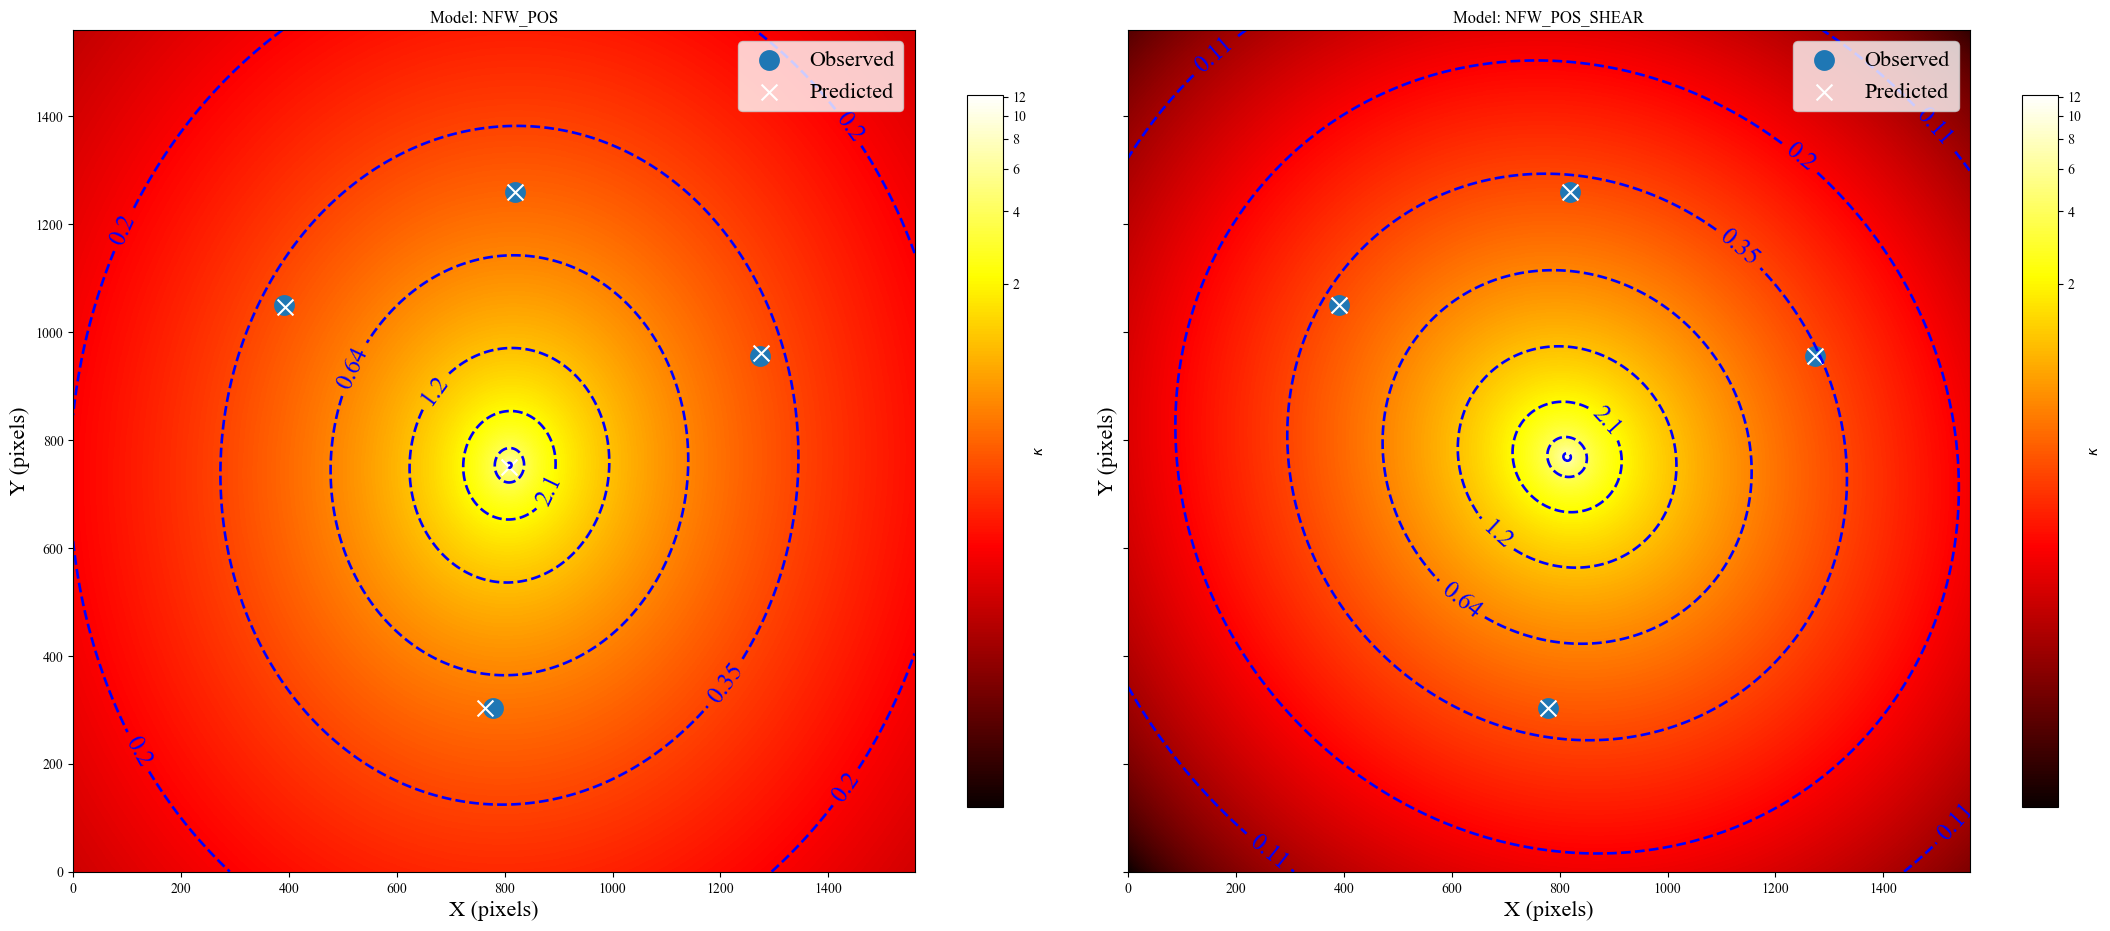

In [13]:
compare_models('NFW', 'NFW_POS', 'NFW+SHEAR', 'NFW_POS_SHEAR')